In [30]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [32]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../..")

print('Current location: ', os.getcwd())

Current location:  /home/dh3553/projects/fairness-variance


# Visualizations

In [33]:
from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.visualizations import preprocess_metrics, create_group_base_and_fair_models_box_plot, \
    create_scatter_plot, create_group_models_box_plot_per_test_set, create_bar_plot_for_model_selection

## Initialize Configs

In [34]:
EXPERIMENT_NAME = 'out_of_domain_uncertainty_poor_income'
DB_COLLECTION_NAME = 'out_of_domain_uncertainty'
DATASET_NAME = 'Folktables_2018_Income'
EXPERIMENT_SESSION_UUID = 'ec0fbcf0-8e99-4eba-aecf-bf735f35f261'
SENSITIVE_ATTRS = ['SEX', 'RAC1P', 'SEX&RAC1P']
MODEL_NAMES = ['RandomForestClassifier']

In [35]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [36]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [37]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(190, 33)

In [38]:
models_metrics_dct[list(models_metrics_dct.keys())[0]][
    models_metrics_dct[list(models_metrics_dct.keys())[0]]['Experiment_Iteration'] == 'Exp_iter_1'
].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
0,Accuracy,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-16 07:29:20.197,ec0fbcf0-8e99-4eba-aecf-bf735f35f261,Exp_iter_1,...,0.797564,1.000000,0.000000,0.850462,1.000000,0.000000,0.766829,1.000000,0.000000,0.807600
1,Accuracy,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,1,OK,2023-10-16 07:29:20.212,ec0fbcf0-8e99-4eba-aecf-bf735f35f261,Exp_iter_1,...,0.756579,1.000000,0.000000,0.754642,1.000000,0.000000,0.758826,1.000000,0.000000,0.756800
8,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-16 09:32:17.110,ec0fbcf0-8e99-4eba-aecf-bf735f35f261,Exp_iter_1,...,0.806473,1.000000,0.000000,0.853333,1.000000,0.000000,0.780098,1.000000,0.000000,0.815800
9,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-16 09:32:17.121,ec0fbcf0-8e99-4eba-aecf-bf735f35f261,Exp_iter_1,...,0.754618,1.000000,0.000000,0.752928,1.000000,0.000000,0.756461,1.000000,0.000000,0.754750
10,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-16 07:29:20.197,ec0fbcf0-8e99-4eba-aecf-bf735f35f261,Exp_iter_1,...,0.592672,0.537826,0.808755,0.547803,0.502191,0.807210,0.617260,0.559225,0.808116,0.583400
11,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,1,OK,2023-10-16 07:29:20.212,ec0fbcf0-8e99-4eba-aecf-bf735f35f261,Exp_iter_1,...,0.630288,0.572344,0.810384,0.631701,0.573884,0.809527,0.628488,0.570701,0.810308,0.630044
18,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-16 09:32:17.110,ec0fbcf0-8e99-4eba-aecf-bf735f35f261,Exp_iter_1,...,0.623488,0.570528,0.844184,0.574428,0.529214,0.837492,0.644639,0.588998,0.842023,0.610411
19,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-16 09:32:17.121,ec0fbcf0-8e99-4eba-aecf-bf735f35f261,Exp_iter_1,...,0.630285,0.572094,0.809238,0.631602,0.573766,0.807848,0.628466,0.570174,0.809529,0.629984
20,F1,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-16 07:29:20.197,ec0fbcf0-8e99-4eba-aecf-bf735f35f261,Exp_iter_1,...,0.618004,1.000000,0.000000,0.585560,1.000000,0.000000,0.630603,1.000000,0.000000,0.614738
21,F1,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,1,OK,2023-10-16 07:29:20.212,ec0fbcf0-8e99-4eba-aecf-bf735f35f261,Exp_iter_1,...,0.698679,1.000000,0.000000,0.696939,1.000000,0.000000,0.700746,1.000000,0.000000,0.698898


In [39]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct_for_mult_test_sets()

In [40]:
exp_subgroup_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][0].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
0,Accuracy,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-16 07:29:20.197,ec0fbcf0-8e99-4eba-aecf-bf735f35f261,Exp_iter_1,...,0.797564,1.000000,0.000000,0.850462,1.000000,0.000000,0.766829,1.000000,0.000000,0.807600
10,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-16 07:29:20.197,ec0fbcf0-8e99-4eba-aecf-bf735f35f261,Exp_iter_1,...,0.592672,0.537826,0.808755,0.547803,0.502191,0.807210,0.617260,0.559225,0.808116,0.583400
20,F1,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-16 07:29:20.197,ec0fbcf0-8e99-4eba-aecf-bf735f35f261,Exp_iter_1,...,0.618004,1.000000,0.000000,0.585560,1.000000,0.000000,0.630603,1.000000,0.000000,0.614738
30,FNR,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-16 07:29:20.197,ec0fbcf0-8e99-4eba-aecf-bf735f35f261,Exp_iter_1,...,0.487650,0.000000,1.000000,0.502896,0.000000,1.000000,0.480652,0.000000,1.000000,0.488333
40,FPR,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-16 07:29:20.197,ec0fbcf0-8e99-4eba-aecf-bf735f35f261,Exp_iter_1,...,0.068457,0.000000,1.000000,0.054181,0.000000,1.000000,0.079405,0.000000,1.000000,0.065571
50,IQR,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-16 07:29:20.197,ec0fbcf0-8e99-4eba-aecf-bf735f35f261,Exp_iter_1,...,0.065958,0.058973,0.093479,0.060416,0.054410,0.094573,0.069328,0.062046,0.093277,0.064984
60,Jitter,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-16 07:29:20.197,ec0fbcf0-8e99-4eba-aecf-bf735f35f261,Exp_iter_1,...,0.063474,0.044286,0.139074,0.050341,0.033132,0.148216,0.070064,0.050729,0.133650,0.060449
70,Label_Stability,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-16 07:29:20.197,ec0fbcf0-8e99-4eba-aecf-bf735f35f261,Exp_iter_1,...,0.909401,0.938163,0.796084,0.927881,0.953823,0.780343,0.900441,0.929257,0.805674,0.913818
80,Mean,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-16 07:29:20.197,ec0fbcf0-8e99-4eba-aecf-bf735f35f261,Exp_iter_1,...,0.724715,0.747065,0.636657,0.772779,0.799242,0.622278,0.695403,0.711449,0.642633,0.733124
90,Overall_Uncertainty,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-16 07:29:20.197,ec0fbcf0-8e99-4eba-aecf-bf735f35f261,Exp_iter_1,...,0.605668,0.549535,0.826822,0.559794,0.513017,0.825824,0.630909,0.571573,0.826048,0.596240


In [41]:
exp_group_metrics_dct = exp_composer.compose_group_metrics_for_mult_test_sets(exp_subgroup_metrics_dct)

In [42]:
exp_group_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][0].head(20)

,Metric,SEX,RAC1P,SEX&RAC1P,Model_Name,Experiment_Iteration,Intervention_Param,Test_Set_Index
0,Equalized_Odds_TPR,-0.022244,-0.045346,-0.012350,RandomForestClassifier,Exp_iter_1,0.7,0
1,Equalized_Odds_FPR,-0.025224,-0.014677,-0.020887,RandomForestClassifier,Exp_iter_1,0.7,0
2,Equalized_Odds_FNR,0.022244,0.045346,0.012350,RandomForestClassifier,Exp_iter_1,0.7,0
3,Disparate_Impact,1.078387,1.046761,1.180871,RandomForestClassifier,Exp_iter_1,0.7,0
4,Statistical_Parity_Difference,0.050728,0.030878,0.119028,RandomForestClassifier,Exp_iter_1,0.7,0
5,Accuracy_Parity,0.083632,0.055337,0.088579,RandomForestClassifier,Exp_iter_1,0.7,0
6,Label_Stability_Ratio,1.030474,1.030008,1.042867,RandomForestClassifier,Exp_iter_1,0.7,0
7,IQR_Parity,-0.008913,-0.005684,-0.008605,RandomForestClassifier,Exp_iter_1,0.7,0
8,Std_Parity,-0.006250,-0.004217,-0.006433,RandomForestClassifier,Exp_iter_1,0.7,0
9,Std_Ratio,0.874427,0.911426,0.864439,RandomForestClassifier,Exp_iter_1,0.7,0


In [43]:
exp_group_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][0].head()

,Metric,SEX,RAC1P,SEX&RAC1P,Model_Name,Experiment_Iteration,Intervention_Param,Test_Set_Index
0,Equalized_Odds_TPR,-0.022244,-0.045346,-0.012350,RandomForestClassifier,Exp_iter_1,0.7,0
1,Equalized_Odds_FPR,-0.025224,-0.014677,-0.020887,RandomForestClassifier,Exp_iter_1,0.7,0
2,Equalized_Odds_FNR,0.022244,0.045346,0.012350,RandomForestClassifier,Exp_iter_1,0.7,0
3,Disparate_Impact,1.078387,1.046761,1.180871,RandomForestClassifier,Exp_iter_1,0.7,0
4,Statistical_Parity_Difference,0.050728,0.030878,0.119028,RandomForestClassifier,Exp_iter_1,0.7,0


## Figure 1. Subgroup boxplots.

In [44]:
melted_all_subgroup_metrics_per_model_dct, melted_all_group_metrics_per_model_dct = \
    preprocess_metrics(exp_subgroup_metrics_dct, exp_group_metrics_dct)

In [45]:
vals_to_replace = {
    'Model_Name': {
        'LGBMClassifier': 'LGBM',
        'LogisticRegression': 'LR',
        'RandomForestClassifier': 'RF',
        'MLPClassifier': 'MLP'
    }
}

<Figure size 864x432 with 0 Axes>

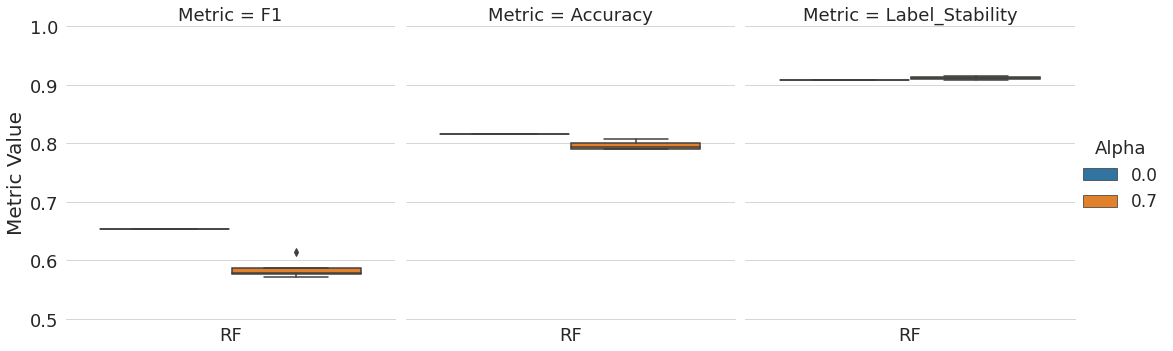

In [46]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.5, 1.0),
                                           metric_names=['F1', 'Accuracy', 'Label_Stability'],
                                           vals_to_replace=vals_to_replace)

<Figure size 864x432 with 0 Axes>

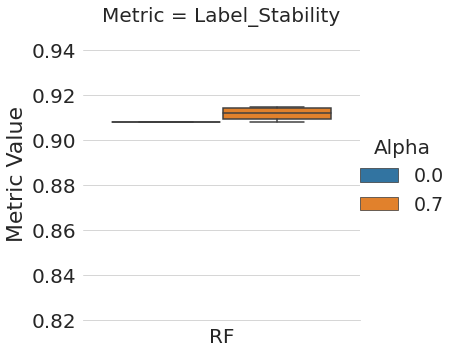

In [47]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.82, 0.95),
                                           metric_names=['Label_Stability'],
                                           vals_to_replace=vals_to_replace)

## Figure 2. Create group boxplots.

<Figure size 864x432 with 0 Axes>

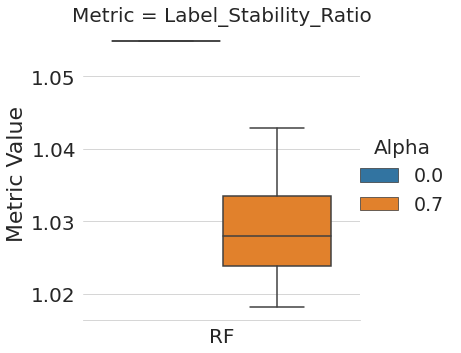

In [48]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='SEX&RAC1P',
                                           metric_names=['Label_Stability_Ratio'],
                                           vals_to_replace=vals_to_replace)

<Figure size 864x432 with 0 Axes>

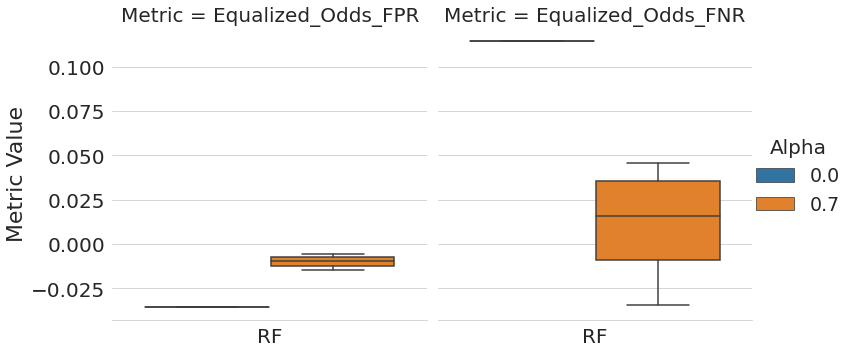

In [49]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='RAC1P',
                                           metric_names=['Equalized_Odds_FPR', 'Equalized_Odds_FNR'],
                                           vals_to_replace=vals_to_replace)

## Figure 5. Out-of-domain boxplots.

In [50]:
new_vals_to_replace = vals_to_replace
new_vals_to_replace['Test_Set_Index'] = {
    0: 'Poor set',
    1: 'Rich set',
}

<Figure size 864x432 with 0 Axes>

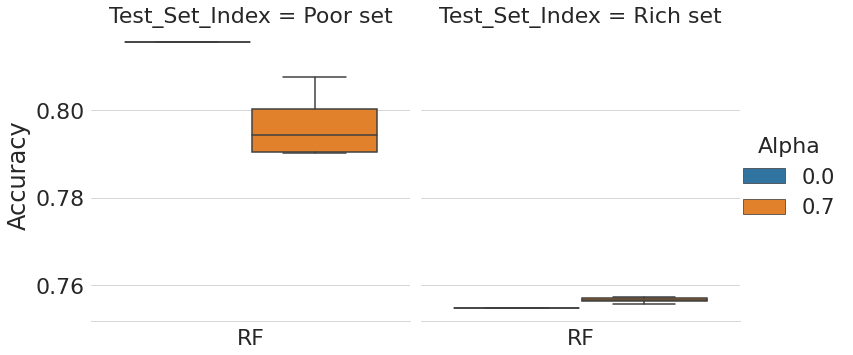

In [51]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Accuracy',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 864x432 with 0 Axes>

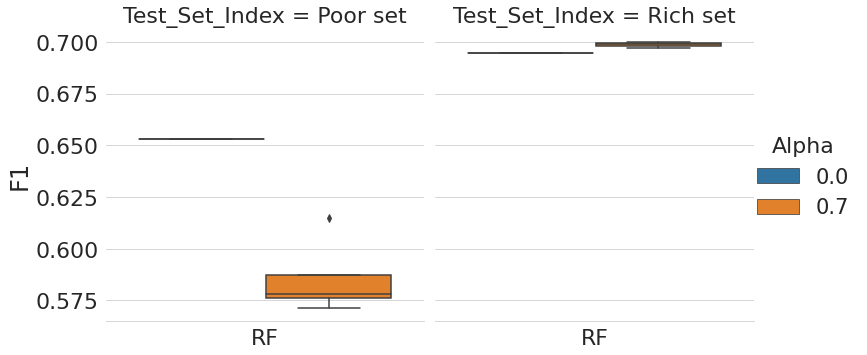

In [52]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='F1',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 864x432 with 0 Axes>

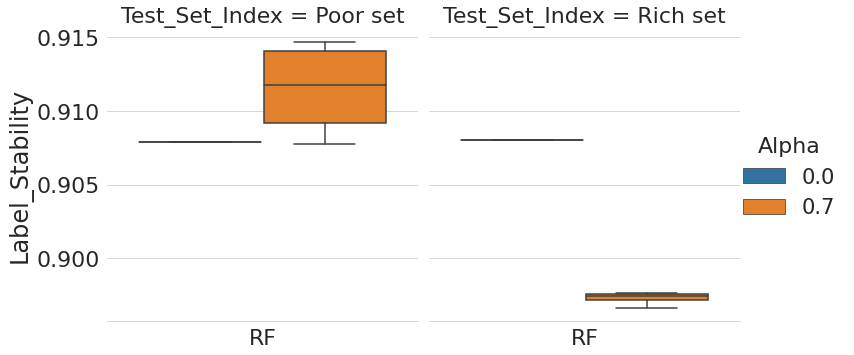

In [53]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Label_Stability',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 864x432 with 0 Axes>

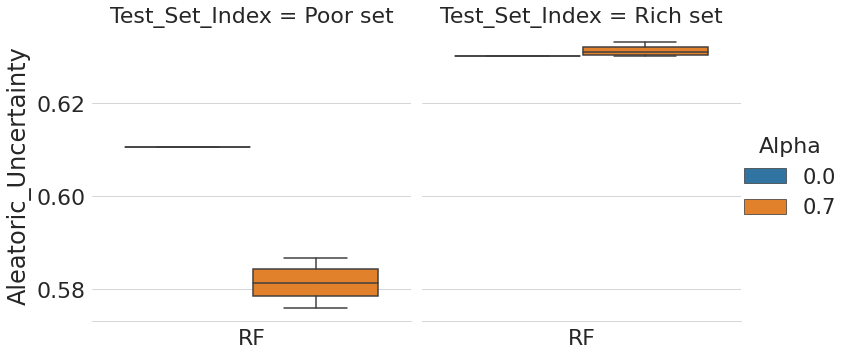

In [54]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Aleatoric_Uncertainty',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 864x432 with 0 Axes>

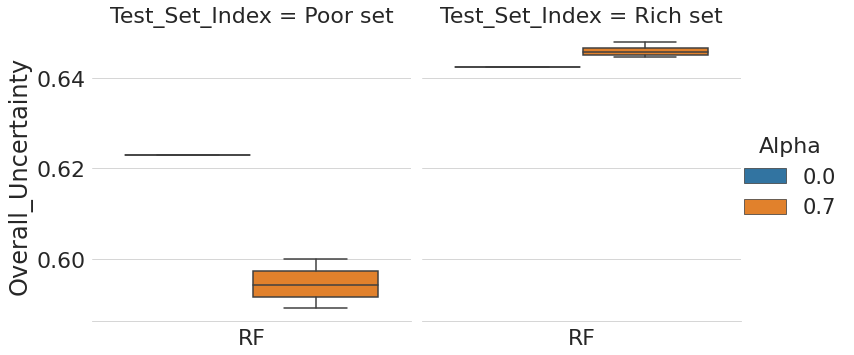

In [55]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Overall_Uncertainty',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 864x432 with 0 Axes>

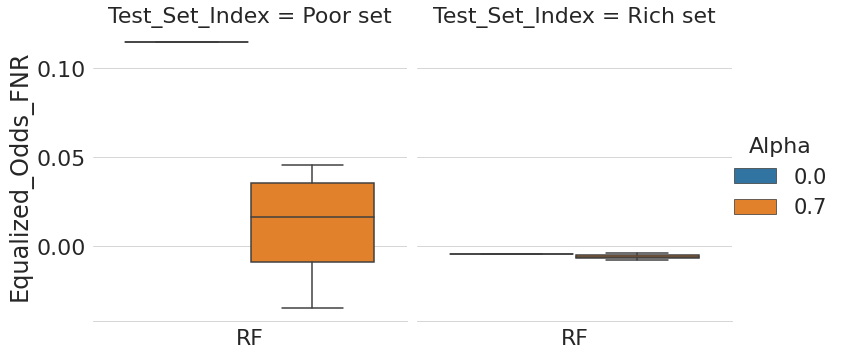

In [56]:
create_group_models_box_plot_per_test_set(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FNR', group='RAC1P',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 864x432 with 0 Axes>

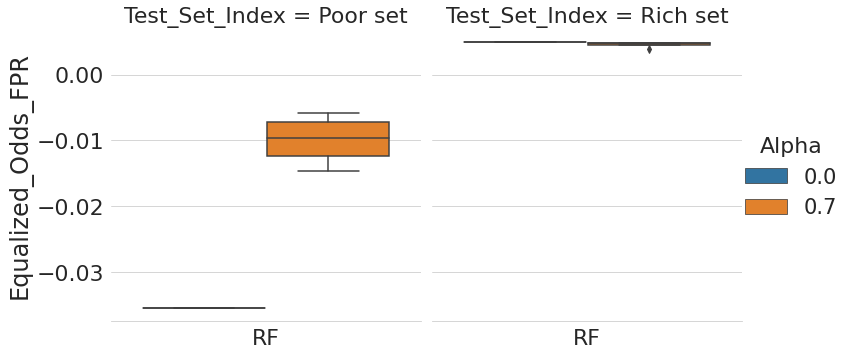

In [57]:
create_group_models_box_plot_per_test_set(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FPR', group='RAC1P',
                                          vals_to_replace=new_vals_to_replace)